# In this Notebook we perform the following activities

### 1. Import the required Libraries
### 2. Reading data from DataFrame
### 3. Build Utility Functions
### 4. Verify and Validate Image
### 5. EDA on Length and breadth of the Rectangle - General
### 6. Data Pre-Processing
### 7. Train and Test data Split
### 8. Using InceptionResNetV2 Model - Deep Learning Model
### 9. Model Training and Model Saving

### 1. Import the required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [3]:
!python - version

^C


In [4]:
from platform import python_version
print(python_version())

3.9.12


### 2. Reading data from DataFrame

In [2]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,1093,1396,645,727
1,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,134,301,312,350
2,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,31,139,128,161
3,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,164,316,216,243
4,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,813,1067,665,724


In [3]:
import xml.etree.ElementTree as xet

In [4]:
filename = df['filepath'][0]
filename

'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N1.xml'

### 3. Build Utility Function which gives image_path for a given File path

In [5]:
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images',filename_image)
    return filepath_image

In [6]:
getFilename(filename)

'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N1.jpeg'

In [7]:
image_path = list(df['filepath'].apply(getFilename))
image_path 

['C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N1.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N100.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N101.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N102.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N103.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N104.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N105.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N106.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N107.jpeg',
 'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N108.jpeg',
 'C:\\Users\\DELL\\ana

In [11]:
df.head()

,filepath,xmin,xmax,ymin,ymax
0,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,1093,1396,645,727
1,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,134,301,312,350
2,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,31,139,128,161
3,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,164,316,216,243
4,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,813,1067,665,724


In [59]:
def func_rect_length(row):
    length=row['xmax']-row['xmin']
    return length
df['x_length']=df.apply(func_rect_length,axis=1)  

In [61]:
def func_rect_breadth(row):
    breadth=row['ymax']-row['ymin']
    return breadth
df['x_breadth']=df.apply(func_rect_breadth,axis=1)  

In [62]:
df.head()

,filepath,xmin,xmax,ymin,ymax,x_length,x_breadth
0,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,1093,1396,645,727,303,82
1,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,134,301,312,350,167,38
2,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,31,139,128,161,108,33
3,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,164,316,216,243,152,27
4,C:\Users\DELL\anaconda3\CS_2\vehicle_plate\Pro...,813,1067,665,724,254,59


### 4. Verify and Validate Image

In [40]:
file_path = image_path[1]
file_path 

'C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\1_Labeling\\images\\N100.jpeg'

In [41]:
img = cv2.imread(file_path)

cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
# 1093	1396	645	727
# 134	301	312	350

#cv2.rectangle(img,(1093,645),(1396,727),(0,255,0),3)
cv2.rectangle(img,(134,312),(301,350),(34,119,255),3)
cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5. EDA on Length and breadth of the Rectangle - General

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


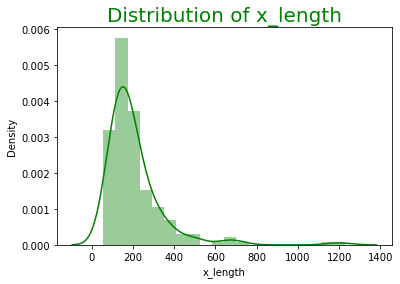

In [68]:
#Create a distribution plot for x_length
sns.distplot(df.x_length,bins=20, color="g")
plt.title("Distribution of x_length", fontsize=20, color = 'green')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


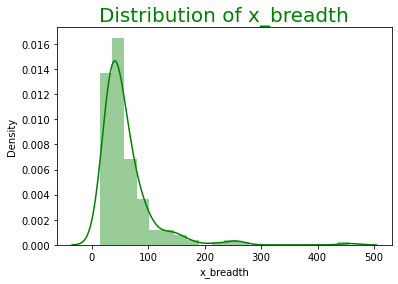

In [69]:
#Create a distribution plot for x_breadth
sns.distplot(df.x_breadth,bins=20, color="g")
plt.title("Distribution of x_breadth", fontsize=20, color = 'green')
plt.show()

In [75]:
df.drop(columns=['x_breadth','x_length'], inplace=True)

### 6. Data Pre-Processing

In [76]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [77]:
labels = df.iloc[:,1:].values

In [78]:
labels

array([[1093, 1396,  645,  727],
       [ 134,  301,  312,  350],
       [  31,  139,  128,  161],
       [ 164,  316,  216,  243],
       [ 813, 1067,  665,  724],
       [  66,  154,  166,  197],
       [ 360,  434,  174,  195],
       [ 137,  262,  249,  290],
       [ 207,  356,  174,  287],
       [ 184,  342,  220,  257],
       [ 148,  239,  250,  320],
       [ 131,  187,  130,  144],
       [ 183,  249,  211,  227],
       [  80,  239,  364,  402],
       [ 179,  347,  256,  290],
       [  39,  108,  129,  157],
       [  15,  200,   33,  126],
       [ 157,  316,  226,  278],
       [ 120,  249,  161,  202],
       [ 532,  852,  636,  706],
       [ 180,  559,  216,  314],
       [ 976, 1284,  669,  754],
       [ 647,  736,  332,  387],
       [ 311,  506,  324,  370],
       [ 342,  494,  243,  288],
       [  11,  246,   78,  165],
       [ 165,  328,  276,  324],
       [ 149,  399,  269,  327],
       [  24,  142,  209,  245],
       [  58,  221,  198,  271],
       [ 3

In [79]:
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # normalization
    # normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # normalized output
    # -------------- append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [80]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [81]:
X.shape,y.shape

((225, 224, 224, 3), (225, 4))

### 7. Train and Test data Split

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

### 8. Using InceptionResNetV2 Model - Deep Learning Model

In [83]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [84]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False,
                                     input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable=False
# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)
# ---------- model
model = Model(inputs=inception_resnet.input,outputs=headmodel)

In [85]:
# compile model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

### 9. Model Training and Saving

In [86]:
from tensorflow.keras.callbacks import TensorBoard

In [87]:
tfb = TensorBoard('C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\object_detection')

In [88]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=300,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/300
18/18 [==============================] - 29s 1s/step - loss: 0.1127 - val_loss: 0.0955
Epoch 2/300
18/18 [==============================] - 13s 717ms/step - loss: 0.0995 - val_loss: 0.1052
Epoch 3/300
18/18 [==============================] - 15s 843ms/step - loss: 0.0918 - val_loss: 0.0939
Epoch 4/300
18/18 [==============================] - 16s 893ms/step - loss: 0.0873 - val_loss: 0.0955
Epoch 5/300
18/18 [==============================] - 15s 851ms/step - loss: 0.0831 - val_loss: 0.0878
Epoch 6/300
18/18 [==============================] - 16s 908ms/step - loss: 0.0807 - val_loss: 0.0858
Epoch 7/300
18/18 [==============================] - 16s 890ms/step - loss: 0.0799 - val_loss: 0.0862
Epoch 8/300
18/18 [==============================] - 16s 920ms/step - loss: 0.0782 - val_loss: 0.0857
Epoch 9/300
18/18 [==============================] - 17s 939ms/step - loss: 0.0799 - val_loss: 0.0844
Epoch 10/300
18/18 [==============================] - 17s 931ms/step - loss: 0.0788 -

In [89]:
model.save('C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\4_models\\object_detection_inception_300.h5')